In [44]:
import params
import curveTreeDB
from google.cloud import datastore, storage, logging
import time
import pickle

In [45]:
def getDiscoveredPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.discoveredPortfolios)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [55]:
portfolios = getDiscoveredPortfolios()

In [56]:
len(portfolios)

4

In [57]:
import pandas as pd
cleanedModels = []
for item in portfolios:
    try:
        print(item["IS_profitability"])
    except:
        continue
    if item["IS_profitability"] < 0.51:
        continue
    if item["portfolioType"].startswith("HRP") == False:
        continue
    newItem = {}
    for key in item:
        newItem[key] = item[key]
    
    itemKeys= list(newItem.keys())
    tickers = []
    for key in itemKeys:
        
        if (key.startswith("OOS") and key != "OOS_profitability" and key != "OOS_annualizedReturn" \
            and key != "OOS_free return" and key != "OOS_annualizedVolatility" and key != "OOS_beta"):
            del newItem[key]
        if len(key) == 3 or key == "SOXX" or key == "benchmark" or key == "IS_benchmark":
            del newItem[key]
            if len(key) == 3 or key == "SOXX":
                tickers.append(key)
    newItem["key"] = item.key.name
    newItem["tickers"] = tickers
    cleanedModels.append(newItem)


0.5444572748267898
0.5538284398388025
0.5601825442099259
0.5500839395635143


In [49]:
cleanedModels[0]


{'ALGORITHMS TRADED': 177,
 'IS_alpha': 0.1124580511096381,
 'IS_annualizedReturn': 0.23947224635081077,
 'IS_annualizedVolatility': 0.2016998276404924,
 'IS_beta': 0.8620213644603689,
 'IS_free return': 0.03777241871031836,
 'IS_monthlyMinimum': -0.14408127983542207,
 'IS_profitability': 0.5444572748267898,
 'IS_rollingSharpeError': 0.9728643447916999,
 'IS_rollingSharpeMinimum': -0.5160224929198057,
 'IS_sharpe': 1.1655719988608808,
 'IS_sharpe difference': 0.7085178717739098,
 'IS_stability': 0.8981778044861752,
 'IS_weeklyMinimum': -0.1080402554690526,
 'IS_yearlyMinimum': -0.17118594017575617,
 'OOS_annualizedReturn': 0.35758246753938616,
 'OOS_annualizedVolatility': 0.16015894501608666,
 'OOS_beta': 1.307776357372392,
 'OOS_free return': 0.1974235225232995,
 'OOS_profitability': 0.5595238095238095,
 'TICKERS TRADED': 9,
 'VO': True,
 'description': 'AUTO GENERATED',
 'key': '0faa84e7da837bbdee031c145fc922212296237b2b011f9be7a4d27a',
 'portfolioType': 'HRP BINARY',
 'startedTradin

ALGORITHMS TRADED
177    0.559524
188    0.551587
Name: OOS_profitability, dtype: float64
ALGORITHMS TRADED
177    0.357582
188    0.070346
Name: OOS_annualizedReturn, dtype: float64
ALGORITHMS TRADED
177    0.197424
188   -0.019494
Name: OOS_free return, dtype: float64
ALGORITHMS TRADED OOS_profitability


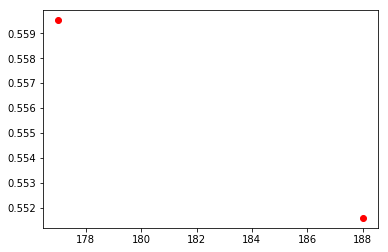

ALGORITHMS TRADED OOS_annualizedReturn


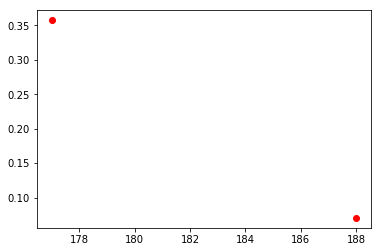

ALGORITHMS TRADED OOS_free return


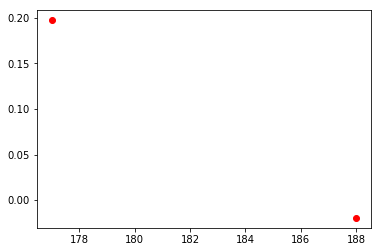

IS_alpha
0.103803    0.551587
0.112458    0.559524
Name: OOS_profitability, dtype: float64
IS_alpha
0.103803    0.070346
0.112458    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_alpha
0.103803   -0.019494
0.112458    0.197424
Name: OOS_free return, dtype: float64
IS_alpha OOS_profitability


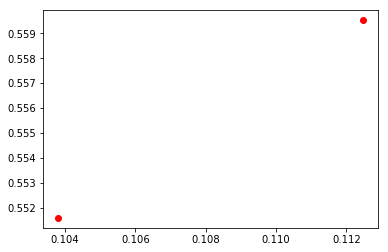

IS_alpha OOS_annualizedReturn


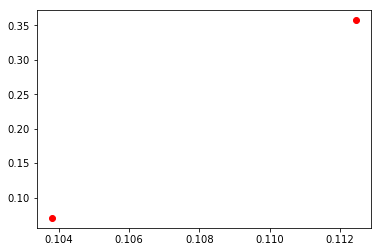

IS_alpha OOS_free return


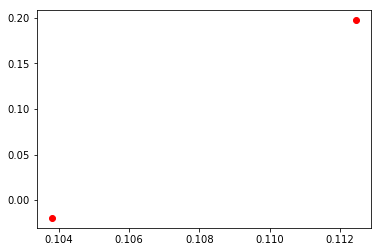

IS_annualizedReturn
0.236123    0.551587
0.239472    0.559524
Name: OOS_profitability, dtype: float64
IS_annualizedReturn
0.236123    0.070346
0.239472    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_annualizedReturn
0.236123   -0.019494
0.239472    0.197424
Name: OOS_free return, dtype: float64
IS_annualizedReturn OOS_profitability


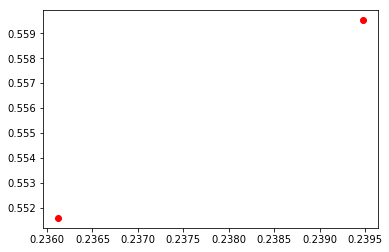

IS_annualizedReturn OOS_annualizedReturn


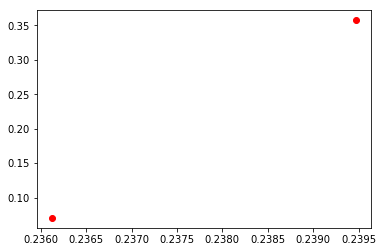

IS_annualizedReturn OOS_free return


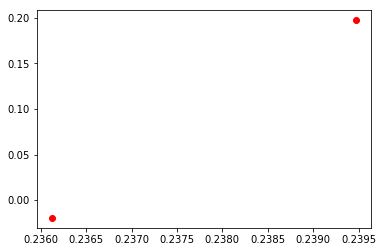

IS_annualizedVolatility
0.153826    0.551587
0.201700    0.559524
Name: OOS_profitability, dtype: float64
IS_annualizedVolatility
0.153826    0.070346
0.201700    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_annualizedVolatility
0.153826   -0.019494
0.201700    0.197424
Name: OOS_free return, dtype: float64
IS_annualizedVolatility OOS_profitability


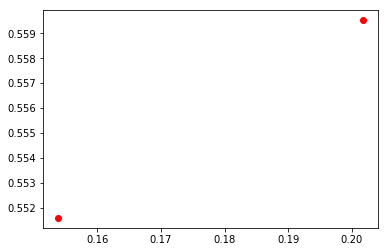

IS_annualizedVolatility OOS_annualizedReturn


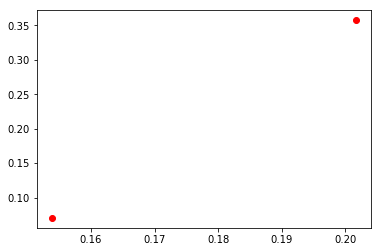

IS_annualizedVolatility OOS_free return


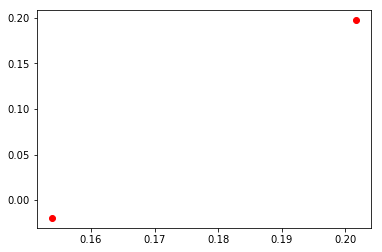

IS_beta
0.804749    0.551587
0.862021    0.559524
Name: OOS_profitability, dtype: float64
IS_beta
0.804749    0.070346
0.862021    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_beta
0.804749   -0.019494
0.862021    0.197424
Name: OOS_free return, dtype: float64
IS_beta OOS_profitability


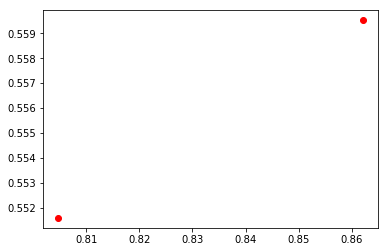

IS_beta OOS_annualizedReturn


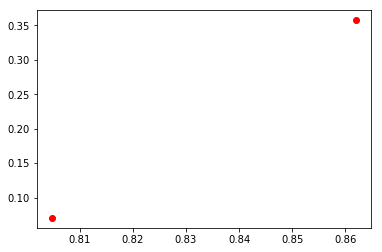

IS_beta OOS_free return


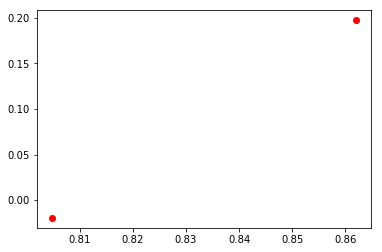

IS_free return
0.037772    0.559524
0.082297    0.551587
Name: OOS_profitability, dtype: float64
IS_free return
0.037772    0.357582
0.082297    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_free return
0.037772    0.197424
0.082297   -0.019494
Name: OOS_free return, dtype: float64
IS_free return OOS_profitability


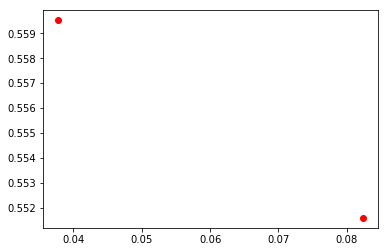

IS_free return OOS_annualizedReturn


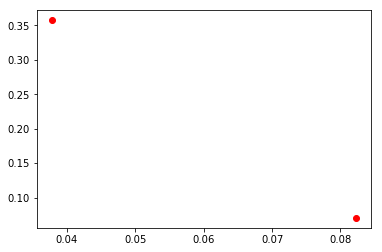

IS_free return OOS_free return


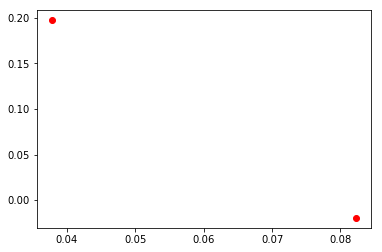

IS_monthlyMinimum
-0.156707    0.551587
-0.144081    0.559524
Name: OOS_profitability, dtype: float64
IS_monthlyMinimum
-0.156707    0.070346
-0.144081    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_monthlyMinimum
-0.156707   -0.019494
-0.144081    0.197424
Name: OOS_free return, dtype: float64
IS_monthlyMinimum OOS_profitability


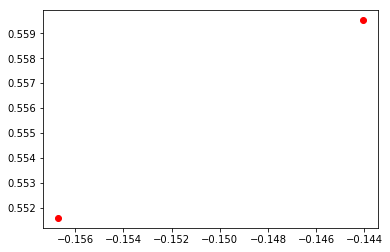

IS_monthlyMinimum OOS_annualizedReturn


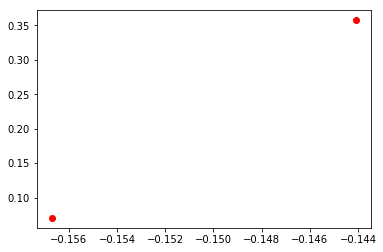

IS_monthlyMinimum OOS_free return


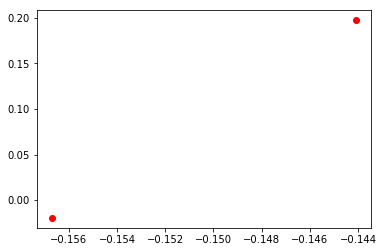

IS_profitability
0.544457    0.559524
0.560183    0.551587
Name: OOS_profitability, dtype: float64
IS_profitability
0.544457    0.357582
0.560183    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_profitability
0.544457    0.197424
0.560183   -0.019494
Name: OOS_free return, dtype: float64
IS_profitability OOS_profitability


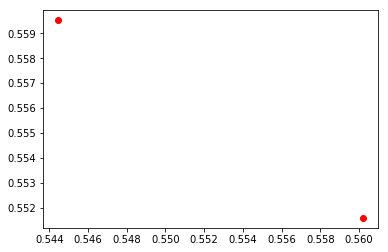

IS_profitability OOS_annualizedReturn


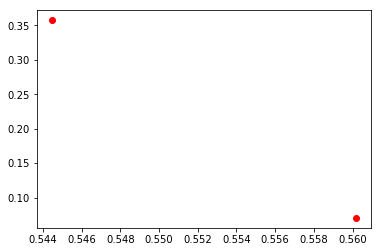

IS_profitability OOS_free return


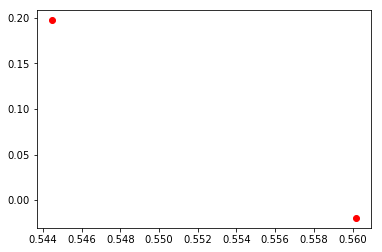

IS_rollingSharpeError
0.702336    0.551587
0.972864    0.559524
Name: OOS_profitability, dtype: float64
IS_rollingSharpeError
0.702336    0.070346
0.972864    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeError
0.702336   -0.019494
0.972864    0.197424
Name: OOS_free return, dtype: float64
IS_rollingSharpeError OOS_profitability


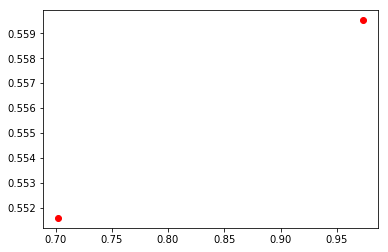

IS_rollingSharpeError OOS_annualizedReturn


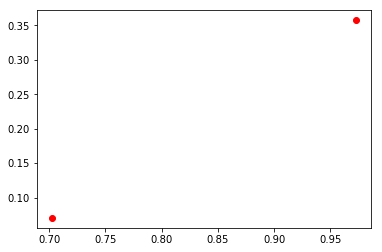

IS_rollingSharpeError OOS_free return


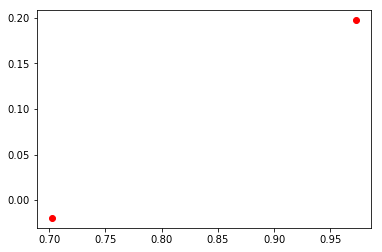

IS_rollingSharpeMinimum
-0.516022    0.559524
-0.454212    0.551587
Name: OOS_profitability, dtype: float64
IS_rollingSharpeMinimum
-0.516022    0.357582
-0.454212    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_rollingSharpeMinimum
-0.516022    0.197424
-0.454212   -0.019494
Name: OOS_free return, dtype: float64
IS_rollingSharpeMinimum OOS_profitability


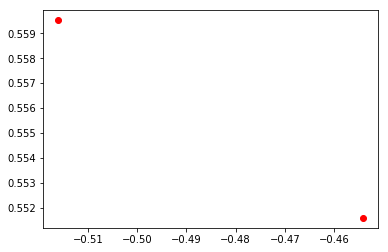

IS_rollingSharpeMinimum OOS_annualizedReturn


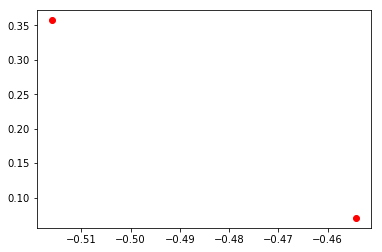

IS_rollingSharpeMinimum OOS_free return


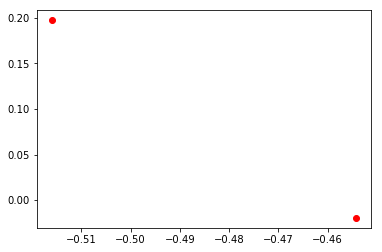

IS_sharpe
1.165572    0.559524
1.455564    0.551587
Name: OOS_profitability, dtype: float64
IS_sharpe
1.165572    0.357582
1.455564    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_sharpe
1.165572    0.197424
1.455564   -0.019494
Name: OOS_free return, dtype: float64
IS_sharpe OOS_profitability


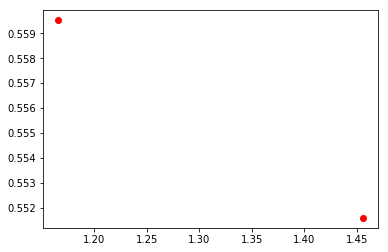

IS_sharpe OOS_annualizedReturn


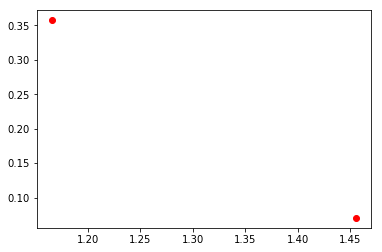

IS_sharpe OOS_free return


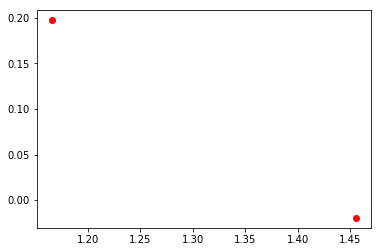

IS_sharpe difference
0.708518    0.559524
0.998510    0.551587
Name: OOS_profitability, dtype: float64
IS_sharpe difference
0.708518    0.357582
0.998510    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_sharpe difference
0.708518    0.197424
0.998510   -0.019494
Name: OOS_free return, dtype: float64
IS_sharpe difference OOS_profitability


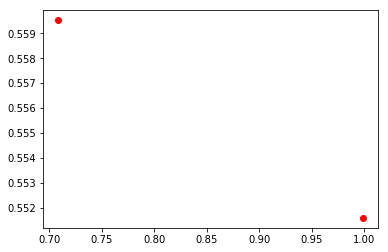

IS_sharpe difference OOS_annualizedReturn


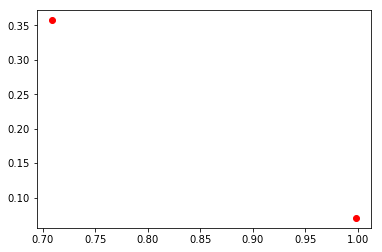

IS_sharpe difference OOS_free return


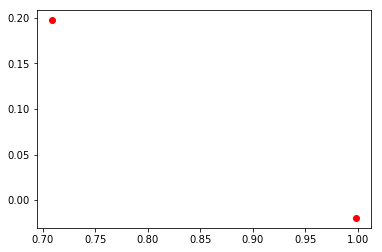

IS_stability
0.898178    0.559524
0.970085    0.551587
Name: OOS_profitability, dtype: float64
IS_stability
0.898178    0.357582
0.970085    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_stability
0.898178    0.197424
0.970085   -0.019494
Name: OOS_free return, dtype: float64
IS_stability OOS_profitability


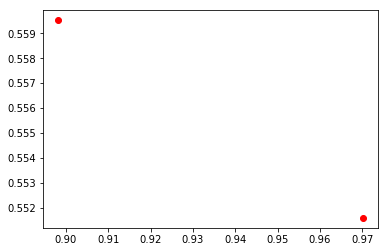

IS_stability OOS_annualizedReturn


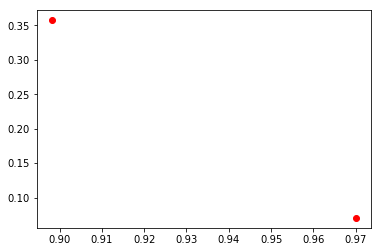

IS_stability OOS_free return


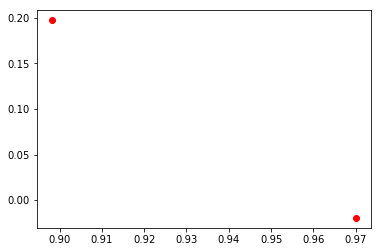

IS_weeklyMinimum
-0.114603    0.551587
-0.108040    0.559524
Name: OOS_profitability, dtype: float64
IS_weeklyMinimum
-0.114603    0.070346
-0.108040    0.357582
Name: OOS_annualizedReturn, dtype: float64
IS_weeklyMinimum
-0.114603   -0.019494
-0.108040    0.197424
Name: OOS_free return, dtype: float64
IS_weeklyMinimum OOS_profitability


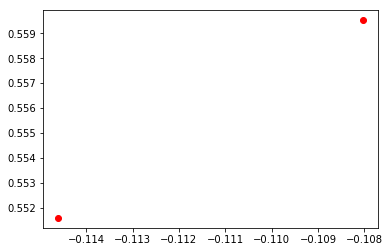

IS_weeklyMinimum OOS_annualizedReturn


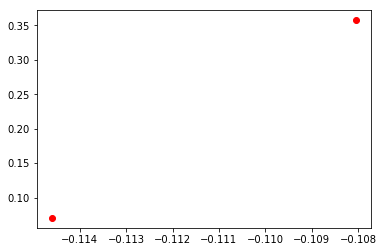

IS_weeklyMinimum OOS_free return


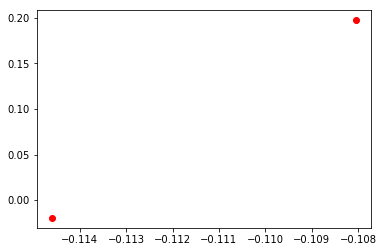

IS_yearlyMinimum
-0.171186    0.559524
-0.126963    0.551587
Name: OOS_profitability, dtype: float64
IS_yearlyMinimum
-0.171186    0.357582
-0.126963    0.070346
Name: OOS_annualizedReturn, dtype: float64
IS_yearlyMinimum
-0.171186    0.197424
-0.126963   -0.019494
Name: OOS_free return, dtype: float64
IS_yearlyMinimum OOS_profitability


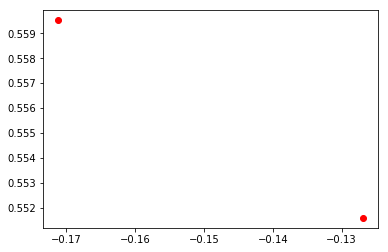

IS_yearlyMinimum OOS_annualizedReturn


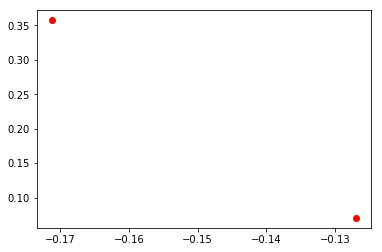

IS_yearlyMinimum OOS_free return


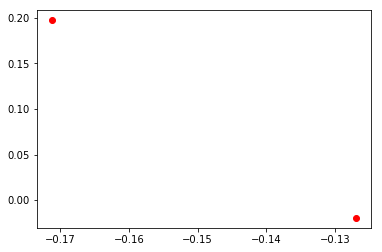

OOS_annualizedReturn
0.070346    0.551587
0.357582    0.559524
Name: OOS_profitability, dtype: float64
OOS_annualizedReturn
0.070346    0.070346
0.357582    0.357582
Name: OOS_annualizedReturn, dtype: float64
OOS_annualizedReturn
0.070346   -0.019494
0.357582    0.197424
Name: OOS_free return, dtype: float64
OOS_annualizedReturn OOS_profitability


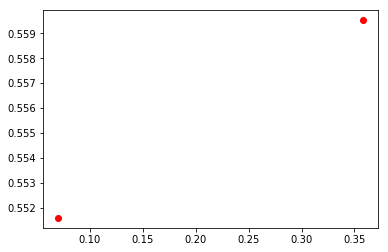

OOS_annualizedReturn OOS_annualizedReturn


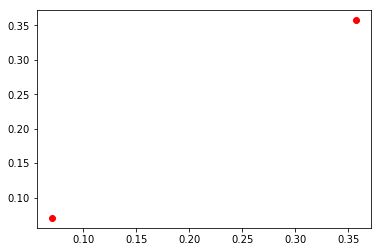

OOS_annualizedReturn OOS_free return


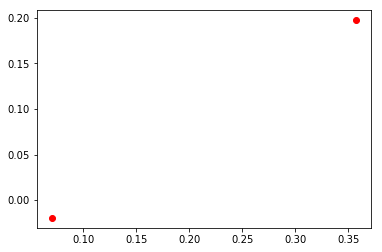

OOS_annualizedVolatility
0.089840    0.551587
0.160159    0.559524
Name: OOS_profitability, dtype: float64
OOS_annualizedVolatility
0.089840    0.070346
0.160159    0.357582
Name: OOS_annualizedReturn, dtype: float64
OOS_annualizedVolatility
0.089840   -0.019494
0.160159    0.197424
Name: OOS_free return, dtype: float64
OOS_annualizedVolatility OOS_profitability


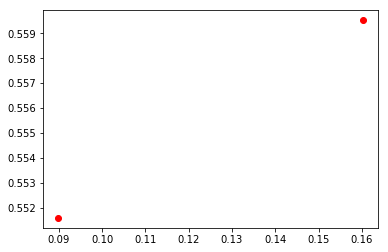

OOS_annualizedVolatility OOS_annualizedReturn


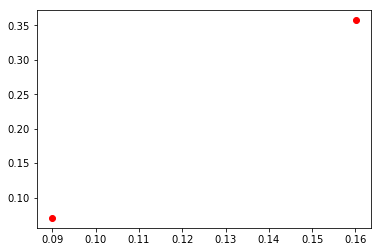

OOS_annualizedVolatility OOS_free return


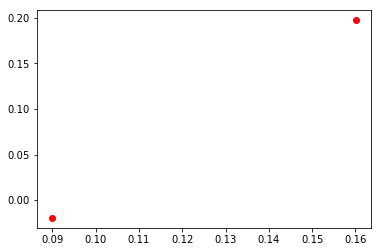

OOS_beta
0.931287    0.551587
1.307776    0.559524
Name: OOS_profitability, dtype: float64
OOS_beta
0.931287    0.070346
1.307776    0.357582
Name: OOS_annualizedReturn, dtype: float64
OOS_beta
0.931287   -0.019494
1.307776    0.197424
Name: OOS_free return, dtype: float64
OOS_beta OOS_profitability


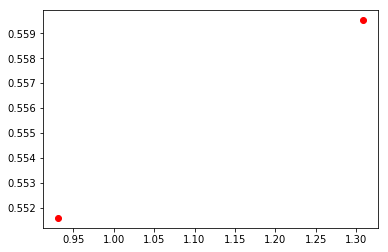

OOS_beta OOS_annualizedReturn


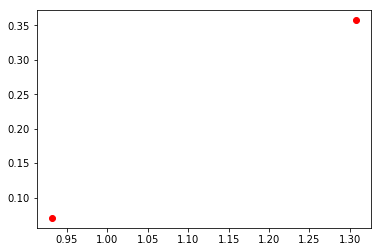

OOS_beta OOS_free return


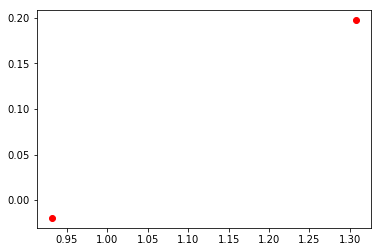

OOS_free return
-0.019494    0.551587
 0.197424    0.559524
Name: OOS_profitability, dtype: float64
OOS_free return
-0.019494    0.070346
 0.197424    0.357582
Name: OOS_annualizedReturn, dtype: float64
OOS_free return
-0.019494   -0.019494
 0.197424    0.197424
Name: OOS_free return, dtype: float64
OOS_free return OOS_profitability


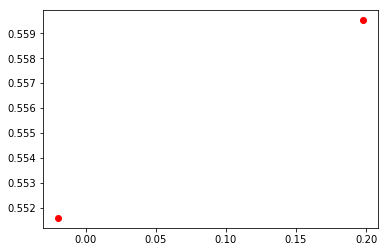

OOS_free return OOS_annualizedReturn


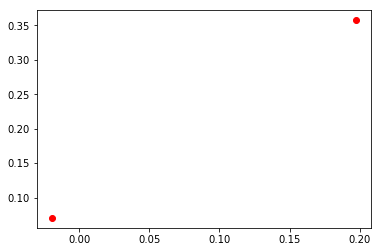

OOS_free return OOS_free return


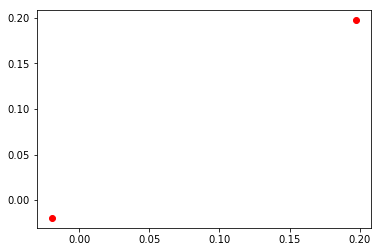

OOS_profitability
0.551587    0.551587
0.559524    0.559524
Name: OOS_profitability, dtype: float64
OOS_profitability
0.551587    0.070346
0.559524    0.357582
Name: OOS_annualizedReturn, dtype: float64
OOS_profitability
0.551587   -0.019494
0.559524    0.197424
Name: OOS_free return, dtype: float64
OOS_profitability OOS_profitability


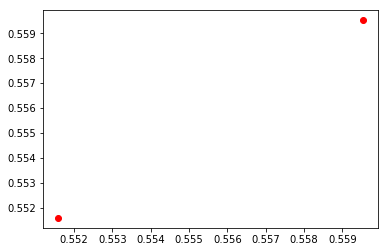

OOS_profitability OOS_annualizedReturn


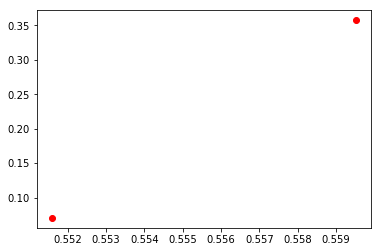

OOS_profitability OOS_free return


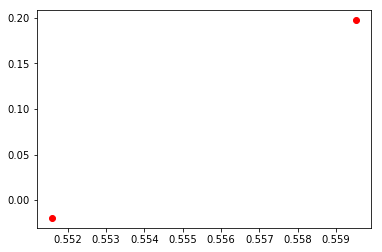

TICKERS TRADED
9     0.559524
13    0.551587
Name: OOS_profitability, dtype: float64
TICKERS TRADED
9     0.357582
13    0.070346
Name: OOS_annualizedReturn, dtype: float64
TICKERS TRADED
9     0.197424
13   -0.019494
Name: OOS_free return, dtype: float64
TICKERS TRADED OOS_profitability


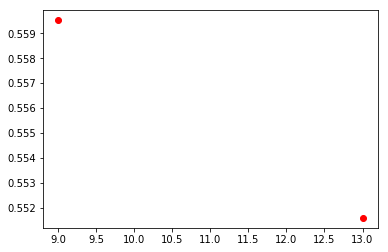

TICKERS TRADED OOS_annualizedReturn


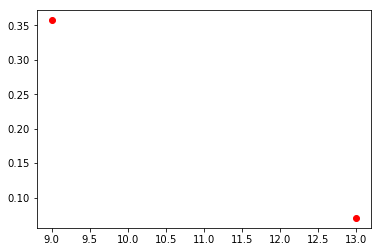

TICKERS TRADED OOS_free return


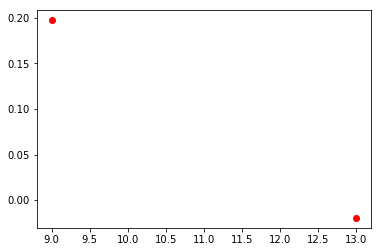

VO
True    0.559524
Name: OOS_profitability, dtype: float64
VO
True    0.357582
Name: OOS_annualizedReturn, dtype: float64
VO
True    0.197424
Name: OOS_free return, dtype: float64
VO OOS_profitability


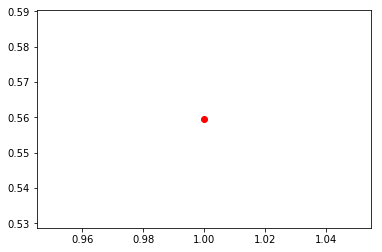

VO OOS_annualizedReturn


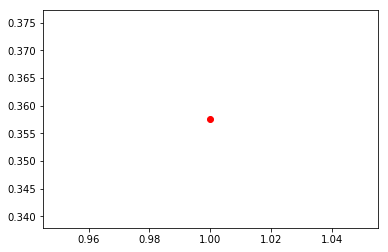

VO OOS_free return


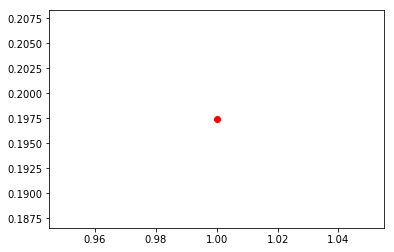

description
AUTO GENERATED    0.555556
Name: OOS_profitability, dtype: float64
description
AUTO GENERATED    0.213964
Name: OOS_annualizedReturn, dtype: float64
description
AUTO GENERATED    0.088965
Name: OOS_free return, dtype: float64
description OOS_profitability
key
0faa84e7da837bbdee031c145fc922212296237b2b011f9be7a4d27a    0.559524
778c26e1c9e4c19577d3939e894b06b576c534c746c62acda24fa49f    0.551587
Name: OOS_profitability, dtype: float64
key
0faa84e7da837bbdee031c145fc922212296237b2b011f9be7a4d27a    0.357582
778c26e1c9e4c19577d3939e894b06b576c534c746c62acda24fa49f    0.070346
Name: OOS_annualizedReturn, dtype: float64
key
0faa84e7da837bbdee031c145fc922212296237b2b011f9be7a4d27a    0.197424
778c26e1c9e4c19577d3939e894b06b576c534c746c62acda24fa49f   -0.019494
Name: OOS_free return, dtype: float64
key OOS_profitability
portfolioType
HRP BINARY    0.559524
HRP FULL      0.551587
Name: OOS_profitability, dtype: float64
portfolioType
HRP BINARY    0.357582
HRP FULL      0.070346
Nam

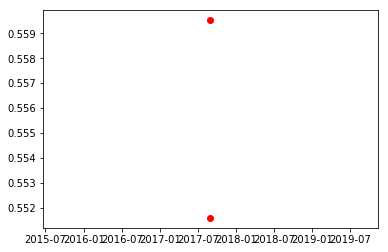

startedTrading OOS_annualizedReturn


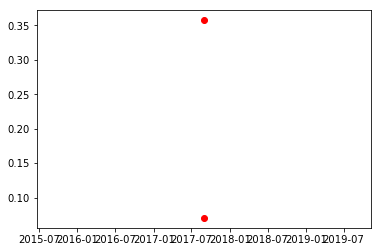

startedTrading OOS_free return


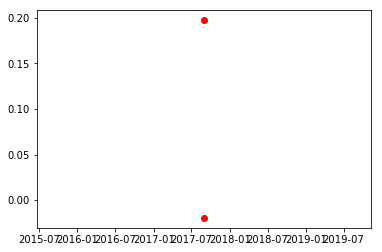

In [50]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    if col == "tickers":
        continue
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_profitability"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_annualizedReturn"].mean()
            print(groupsSharpe)
            groupsSharpe = cm.groupby([col])["OOS_free return"].mean()
            print(groupsSharpe)
            
        print(col, "OOS_profitability")
        xVals = cm[[col]].values
        yVals = cm[["OOS_profitability"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_annualizedReturn")
        xVals = cm[[col]].values
        yVals = cm[["OOS_annualizedReturn"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_free return")
        xVals = cm[[col]].values
        yVals = cm[["OOS_free return"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [51]:
import dataAck
tData = dataAck.getTrainingData(params.tickerDataLookup)
joinedData = tData[0]

ATTEMPTING PULL ALL_TICKERS


In [52]:
def getDiscoveredPortfolioData(portfolioKey):
    storageClient = storage.Client('money-maker-1236')
    while True:
        try:
            bucket = storageClient.get_bucket(params.discoveredPortfolioCache)
            print("ATTEMPTING PULL", portfolioKey)
            blob = storage.Blob(portfolioKey, bucket)
            return pickle.loads(blob.download_as_string())
        except:
            return None
    pass

In [53]:
import empyrical
import dataAck
import portfolioGeneration
def getLimitedDataForPortfolio(tickerAllocationsTable, joinedData, factorToTrade= "VTI"):
    
    rawTickerPerformance = portfolioGeneration.calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)
    
    rawTickerPerformance = rawTickerPerformance[~rawTickerPerformance.index.duplicated(keep='first')]
    

    rawAlgoPerformance = pd.DataFrame(rawTickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return Without Commissions"])

    tickerPerformance, algoPerformance, algoTransactionCost =  portfolioGeneration.calculatePerformanceForAllocations(tickerAllocationsTable, joinedData)

    benchmark = factorToTrade
    factorReturn = dataAck.getDailyFactorReturn(benchmark, joinedData)
    factorReturn.columns = ["Factor Return (" + benchmark + ")"]
    algoPerformance.columns = ["Algo Return"]
    
    algoPerformanceRollingWeekly = algoPerformance.rolling(5, min_periods=5).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingWeekly.columns = ["Weekly Rolling Performance"]
    
    algoPerformanceRollingMonthly = algoPerformance.rolling(22, min_periods=22).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingMonthly.columns = ["Monthly Rolling Performance"]
    
    algoPerformanceRollingYearly = algoPerformance.rolling(252, min_periods=252).apply(lambda x:empyrical.cum_returns(x)[-1]).dropna()
    algoPerformanceRollingYearly.columns = ["Yearly Rolling Performance"]
    
    
    
    
    return algoPerformance.join(factorReturn), algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly

HRP BINARY 177 8
IS 0.8620213644603689 0.5444572748267898 0.23947224635081077 0.2016998276404924
OOS 1.307776357372392 0.5595238095238095 0.35758246753938616 0.16015894501608666
ATTEMPTING PULL 0faa84e7da837bbdee031c145fc922212296237b2b011f9be7a4d27a
Weekly -0.108040255469 0.0048787022293 0.108574250286
Monthly -0.144081279835 0.0214518717425 0.174901805187
Yearly -0.171185940176 0.24439669243 0.876090631015


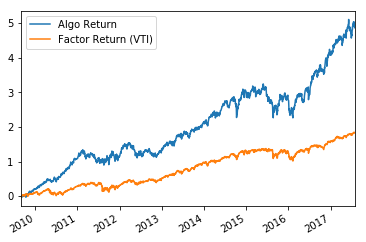

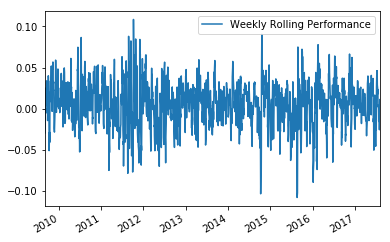

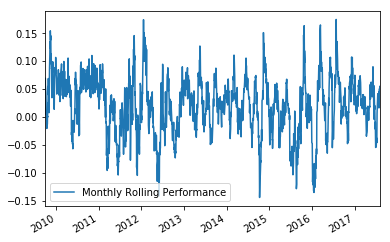

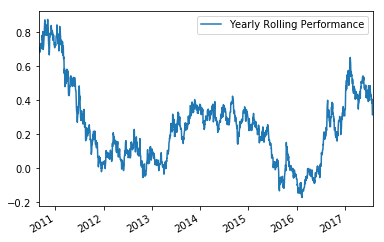

HRP FULL 535 21
IS 0.7285558899104064 0.5538284398388025 0.2753322219869918 0.16875413611066364
OOS 1.2526918392559467 0.5634920634920635 0.22516258437712677 0.11904276808111704
ATTEMPTING PULL 41fde9ef513f9e05ecd2183e55cc4e44493dc5753a38a8481354a89d
Weekly -0.100044717306 0.00504257039049 0.109643933354
Monthly -0.143143397524 0.0229104031143 0.159216903233
Yearly -0.170966944857 0.280160029281 0.854338602224


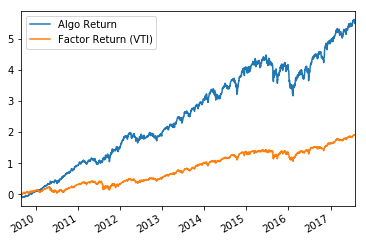

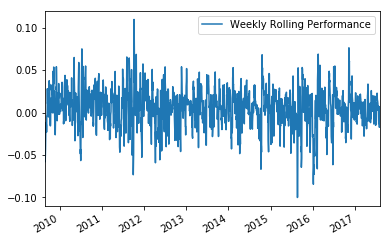

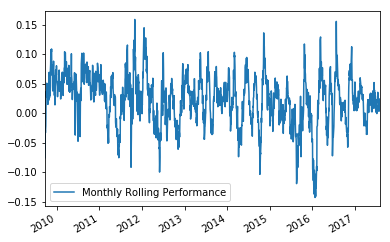

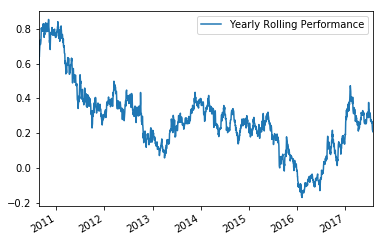

HRP FULL 188 13
IS 0.804749309253615 0.5601825442099259 0.23612279868463304 0.15382628000369605
OOS 0.9312865907559218 0.5515873015873016 0.07034609274063275 0.0898396207342022
ATTEMPTING PULL 778c26e1c9e4c19577d3939e894b06b576c534c746c62acda24fa49f
Weekly -0.114602998696 0.00396888046267 0.107965475341
Monthly -0.156706927923 0.0170137389173 0.128750172144
Yearly -0.126963052217 0.201761023688 0.468016847825


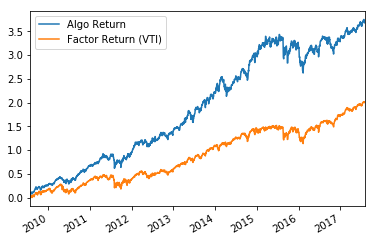

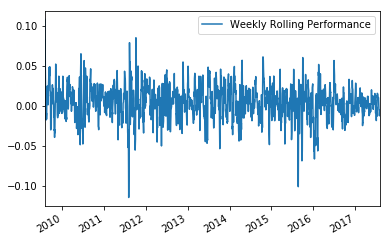

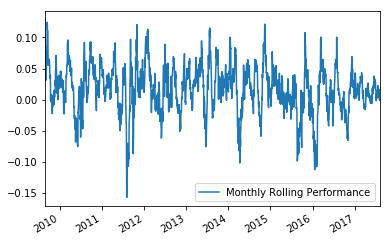

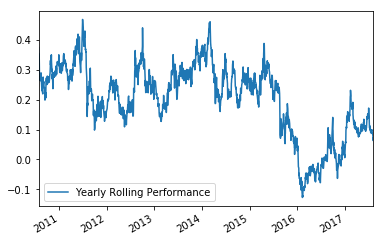

HRP FULL 40 3
IS 0.7050108811656326 0.5500839395635143 0.23686657063850425 0.17867535472870755
OOS 1.0788457375880955 0.5198412698412699 0.24223607940231795 0.10720456982931657
ATTEMPTING PULL ea887da2416748f7f23296ca0f5916c8894631715f8bcd70ccad10d2
Weekly -0.112554150554 0.00450716754239 0.0947661236858
Monthly -0.128337692776 0.0200770750534 0.260359103862
Yearly -0.157037674526 0.229260358934 0.882648126021


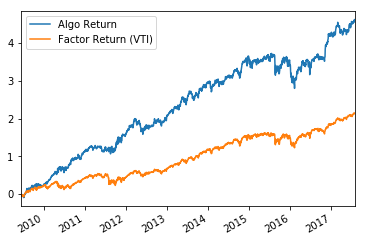

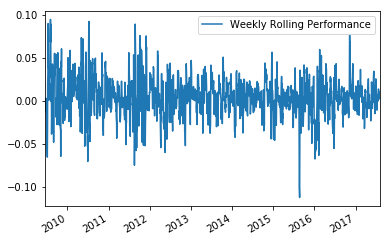

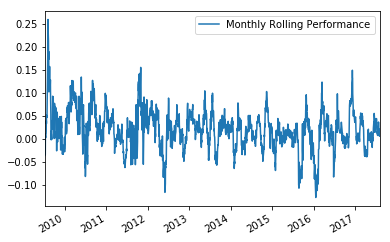

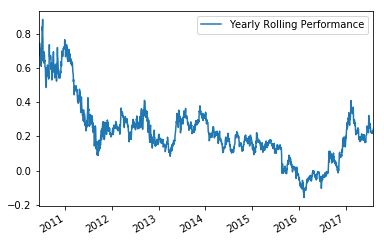

In [58]:
import matplotlib.pyplot as plt

%matplotlib inline
for mod in cleanedModels:
    print(mod["portfolioType"], mod['ALGORITHMS TRADED'], len(mod['tickers']))
    print("IS", mod["IS_beta"], mod["IS_profitability"], mod["IS_annualizedReturn"], mod["IS_annualizedVolatility"])
    print("OOS", mod["OOS_beta"], mod["OOS_profitability"], mod["OOS_annualizedReturn"], mod["OOS_annualizedVolatility"])
    tickerAllocationsTable, historicalWeights, historicalPredictions = getDiscoveredPortfolioData(mod["key"])
    algoPerformance, algoPerformanceRollingWeekly, algoPerformanceRollingMonthly, algoPerformanceRollingYearly = getLimitedDataForPortfolio(tickerAllocationsTable, joinedData)
    empyrical.cum_returns(algoPerformance).plot()
    algoPerformanceRollingWeekly.plot()
    print("Weekly", algoPerformanceRollingWeekly.min().values[0], algoPerformanceRollingWeekly.mean().values[0], algoPerformanceRollingWeekly.max().values[0])
    
    algoPerformanceRollingMonthly.plot()
    print("Monthly", algoPerformanceRollingMonthly.min().values[0], algoPerformanceRollingMonthly.mean().values[0], algoPerformanceRollingMonthly.max().values[0])
    
    algoPerformanceRollingYearly.plot()
    print("Yearly", algoPerformanceRollingYearly.min().values[0], algoPerformanceRollingYearly.mean().values[0], algoPerformanceRollingYearly.max().values[0])
    
    plt.show()
    plt.draw()